In [3]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [4]:
cd = pd.read_csv("D://assignments//assignment 4//Salary_Data.csv")

print(cd.head())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [5]:
cd.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [6]:
cd[cd.duplicated()].shape

(0, 2)

In [7]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [8]:
cd.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

<AxesSubplot:>

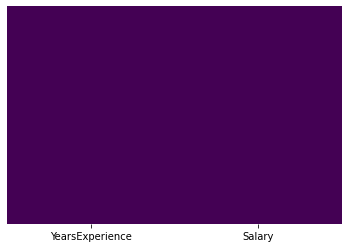

In [9]:
sns.heatmap(cd.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
type(cd)
cd.shape

(30, 2)

In [11]:
cd.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\Users\AMAN SRIVASTAVA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

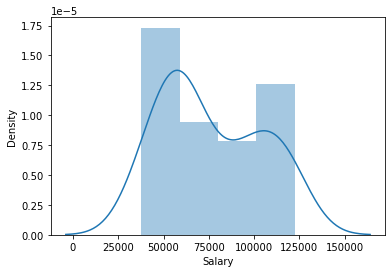

In [12]:
sns.distplot(cd['Salary'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

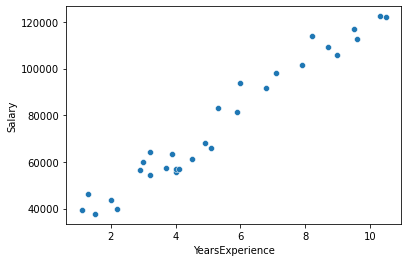

In [13]:
sns.scatterplot(x = "YearsExperience", y = "Salary", data = cd)


{'whiskers': [<matplotlib.lines.Line2D at 0x2935fcb0a90>,
 'caps': [<matplotlib.lines.Line2D at 0x2935fcbd1c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2935fcb0730>],
 'medians': [<matplotlib.lines.Line2D at 0x2935fcbd880>],
 'fliers': [<matplotlib.lines.Line2D at 0x2935fcbdbe0>],
 'means': []}

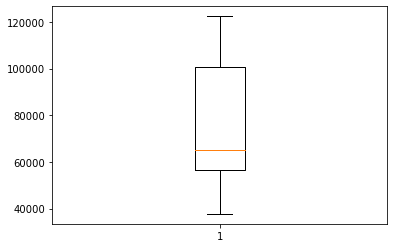

In [14]:
plt.boxplot(cd.Salary)


{'whiskers': [<matplotlib.lines.Line2D at 0x2935fd0eb20>,
 'caps': [<matplotlib.lines.Line2D at 0x2935fd1b220>,
 'boxes': [<matplotlib.lines.Line2D at 0x2935fd0e7c0>],
 'medians': [<matplotlib.lines.Line2D at 0x2935fd1b8e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2935fd1bc40>],
 'means': []}

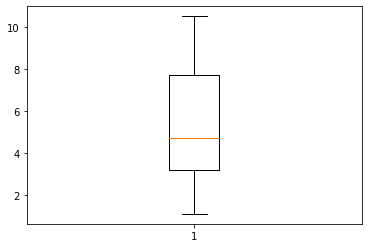

In [15]:
plt.boxplot(cd.YearsExperience)


(array([ 6., 11.,  2.,  4.,  7.]),
 array([ 37731.,  54663.,  71595.,  88527., 105459., 122391.]),
 <BarContainer object of 5 artists>)

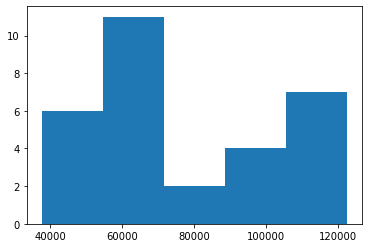

In [16]:
plt.hist(cd.Salary, bins=5)


(array([6., 9., 5., 4., 6.]),
 array([ 1.1 ,  2.98,  4.86,  6.74,  8.62, 10.5 ]),
 <BarContainer object of 5 artists>)

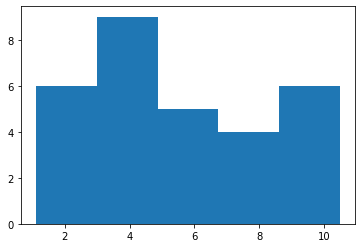

In [17]:
plt.hist(cd.YearsExperience, bins=5)


In [18]:
cd[cd.duplicated()].shape


(0, 2)

In [28]:
model = smf.ols("Salary~YearsExperience",data = cd).fit()

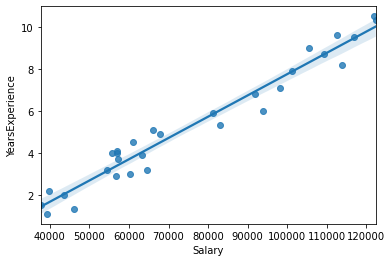

In [29]:
sns.regplot(x="Salary", y="YearsExperience", data=cd);


In [30]:
model.params


Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [31]:
print(model.tvalues, '\n', model.pvalues)    


Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [32]:
(model.rsquared,model.rsquared_adj)


(0.9569566641435086, 0.9554194021486339)

In [33]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 25 Jun 2021   Prob (F-statistic):           1.14e-20
Time:                        20:35:50   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
ypred = model.predict(cd['YearsExperience'])

In [36]:
#Root Mean Squared Error 
np.sqrt(np.mean((cd['YearsExperience'] - ypred)**2))

80440.84508275456

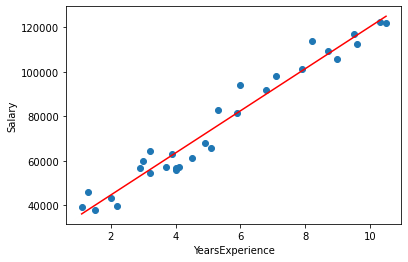

In [39]:
plt.scatter(cd['YearsExperience'], cd['Salary'])
plt.plot(cd['YearsExperience'], ypred, color = 'r')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

In [37]:
model1 = smf.ols("Salary~np.log(YearsExperience)",data = cd).fit()

In [38]:
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Fri, 25 Jun 2021   Prob (F-statistic):           3.25e-13
Time:                        20:55:00   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
ypred1 = model1.predict(cd['YearsExperience'])

In [42]:
#Root Mean Squared Error 
np.sqrt(np.mean((cd['YearsExperience'] - ypred1)**2))

79974.15496099804

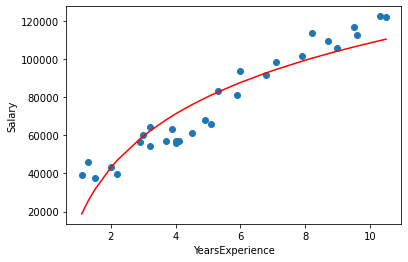

In [43]:
plt.scatter(cd['YearsExperience'], cd['Salary'])
plt.plot(cd['YearsExperience'], ypred1, color = 'r')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()